In [1]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
# fetch dataset 
breast_cancer_wisconsin_original = fetch_ucirepo(id=15) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_original.data.features 
y = breast_cancer_wisconsin_original.data.targets 

X = X.drop(columns=['Bare_nuclei']) # this feature has missing values
feature_names = X.columns.tolist()

X = pd.DataFrame(X, columns=X.columns)

# metadata 
print(breast_cancer_wisconsin_original.metadata) 
  
# variable information 
print(breast_cancer_wisconsin_original.variables) 


{'uci_id': 15, 'name': 'Breast Cancer Wisconsin (Original)', 'repository_url': 'https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original', 'data_url': 'https://archive.ics.uci.edu/static/public/15/data.csv', 'abstract': 'Original Wisconsin Breast Cancer Database', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 699, 'num_features': 9, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['Class'], 'index_col': ['Sample_code_number'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1990, 'last_updated': 'Sun Mar 10 2024', 'dataset_doi': '10.24432/C5HP4Z', 'creators': ['WIlliam Wolberg'], 'intro_paper': None, 'additional_info': {'summary': "Samples arrive periodically as Dr. Wolberg reports his clinical cases. The database therefore reflects this chronological grouping of the data. This grouping information appears immediately below, having been removed fro

In [2]:
X.shape

(699, 8)

In [3]:
unique_counts = {col: X[col].value_counts() for col in X.columns}

# Print the number of unique values and their counts for each feature
for feature, counts in unique_counts.items():
    print(f"Feature: {feature}")
    print(f"Number of unique values: {counts.shape[0]}")
    print(counts, "\n")

Feature: Clump_thickness
Number of unique values: 10
Clump_thickness
1     145
5     130
3     108
4      80
10     69
2      50
8      46
6      34
7      23
9      14
Name: count, dtype: int64 

Feature: Uniformity_of_cell_size
Number of unique values: 10
Uniformity_of_cell_size
1     384
10     67
3      52
2      45
4      40
5      30
8      29
6      27
7      19
9       6
Name: count, dtype: int64 

Feature: Uniformity_of_cell_shape
Number of unique values: 10
Uniformity_of_cell_shape
1     353
2      59
10     58
3      56
4      44
5      34
6      30
7      30
8      28
9       7
Name: count, dtype: int64 

Feature: Marginal_adhesion
Number of unique values: 10
Marginal_adhesion
1     407
3      58
2      58
10     55
4      33
8      25
5      23
6      22
7      13
9       5
Name: count, dtype: int64 

Feature: Single_epithelial_cell_size
Number of unique values: 10
Single_epithelial_cell_size
2     386
3      72
4      48
1      47
6      41
5      39
10     31
8      21
7

In [4]:
import numpy as np
import torch

In [5]:
grouped_data = []

# Group by 'Bland_chromatin' and process each group
for _, group in X.groupby('Bland_chromatin'):
    # Drop the Bland_chromatin' column and convert the group to a NumPy array
    group_data = group.drop(columns=['Bland_chromatin']).to_numpy()

    # Append the group as a NumPy array into the grouped_data list
    grouped_data.append(group_data)

In [6]:
grouped_data

[array([[2, 1, 1, ..., 2, 1, 5],
        [1, 1, 3, ..., 2, 1, 1],
        [3, 1, 1, ..., 2, 1, 1],
        ...,
        [3, 1, 1, ..., 2, 1, 1],
        [3, 1, 1, ..., 3, 1, 1],
        [2, 1, 1, ..., 2, 1, 1]], dtype=int64),
 array([[4, 2, 1, ..., 2, 1, 1],
        [2, 1, 1, ..., 2, 1, 1],
        [4, 1, 1, ..., 2, 1, 1],
        ...,
        [1, 1, 2, ..., 2, 1, 1],
        [3, 1, 1, ..., 2, 3, 1],
        [3, 1, 1, ..., 2, 1, 2]], dtype=int64),
 array([[5, 1, 1, ..., 2, 1, 1],
        [5, 4, 4, ..., 7, 2, 1],
        [3, 1, 1, ..., 2, 1, 1],
        ...,
        [3, 2, 1, ..., 2, 1, 1],
        [2, 1, 1, ..., 2, 1, 1],
        [5, 1, 1, ..., 2, 2, 1]], dtype=int64),
 array([[ 5,  3,  3,  3,  2,  4,  1],
        [ 7,  4,  6,  4,  6,  3,  1],
        [10,  7,  7,  6,  4,  1,  2],
        [ 3,  7,  7,  4,  4,  8,  1],
        [10,  3,  6,  2,  3, 10,  2],
        [ 5,  3,  5,  5,  3, 10,  1],
        [10,  4,  2,  1,  3,  3, 10],
        [ 5,  3,  4,  1,  8,  9,  1],
        [ 9,  4,  

In [7]:
datasets = grouped_data

In [8]:
from src.ocsmm.OneClassSMMClassifier import OneClassSMMClassifier

In [9]:
classifier = OneClassSMMClassifier(nu=0.3)

In [10]:
classifier.fit(datasets)

In [11]:
decision, y_pred = classifier.predict(datasets)

In [12]:
decision

array([ 0.03840104,  0.27824131,  0.32702867,  0.51732788,  0.17864053,
        0.03838595,  1.35185909,  0.28157795, -0.11518812,  0.03840107])

In [13]:
y_pred

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.])

In [14]:
outlier_indices = [i for i, value in enumerate(y_pred) if value == -1]
outlier_indices

[8]

In [15]:
feature_names.remove("Bland_chromatin")

In [16]:
from src.explanation_algorithms.OCSMMSHAP import OCSMMSHAP
ocsmm_shap = OCSMMSHAP(X=datasets, classifier=classifier, decision=decision)
ocsmm_shap.fit_ocsmmshap(X=datasets, num_coalitions=2**len(feature_names))

c:\Users\swath\Documents\CISPA\OCSVM-SHAP\src\utils\shapley_procedure\coalitions.py:18: RuntimeWarning: divide by zero encountered in log2
  set_to_1 = np.floor(np.log2(rest)).astype(int)
c:\Users\swath\Documents\CISPA\OCSVM-SHAP\src\utils\shapley_procedure\coalitions.py:18: RuntimeWarning: invalid value encountered in cast
  set_to_1 = np.floor(np.log2(rest)).astype(int)
c:\Users\swath\Documents\CISPA\OCSVM-SHAP\src\utils\shapley_procedure\coalitions.py:18: RuntimeWarning: invalid value encountered in log2
  set_to_1 = np.floor(np.log2(rest)).astype(int)
100%|██████████| 127/127 [00:33<00:00,  3.76it/s]


In [17]:
mean_stochastic_shapley_values = ocsmm_shap.return_deterministic_shapley_values()

In [18]:
mean_stochastic_shapley_values.T

tensor([[-1.9649e-02,  1.1395e-02,  2.2726e-02,  1.6986e-02,  8.5903e-03,
         -5.0597e-03,  6.9217e-03],
        [ 6.2120e-02,  2.9093e-02,  4.5548e-02,  5.4523e-02,  4.4950e-02,
          2.5802e-02,  1.4190e-02],
        [ 7.7006e-02,  4.2383e-02,  4.2084e-02,  5.7641e-02,  2.2338e-02,
          5.6145e-02,  2.8379e-02],
        [ 6.0090e-02,  8.7222e-02,  7.5853e-02,  7.2263e-02,  1.0188e-01,
          9.0513e-02,  2.9899e-02],
        [ 1.9605e-02,  5.8831e-02,  1.7395e-02, -3.2717e-02,  4.4845e-02,
          1.9864e-02,  5.1145e-02],
        [-1.5877e-04,  1.3236e-02,  2.2548e-02, -1.2942e-02,  1.0057e-02,
          3.0551e-02, -2.4453e-02],
        [ 1.5260e-01,  1.7110e-01,  1.6751e-01,  2.0820e-01,  2.1119e-01,
          2.4649e-01,  1.9408e-01],
        [ 3.2307e-02,  1.5049e-02,  5.9926e-02,  5.2746e-02,  3.8834e-02,
          2.3426e-02,  5.9367e-02],
        [ 1.8774e-02, -1.1881e-02, -6.2339e-03,  2.4656e-02, -8.0579e-02,
         -5.6309e-02, -3.0558e-03],
        [ 

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:3618.)


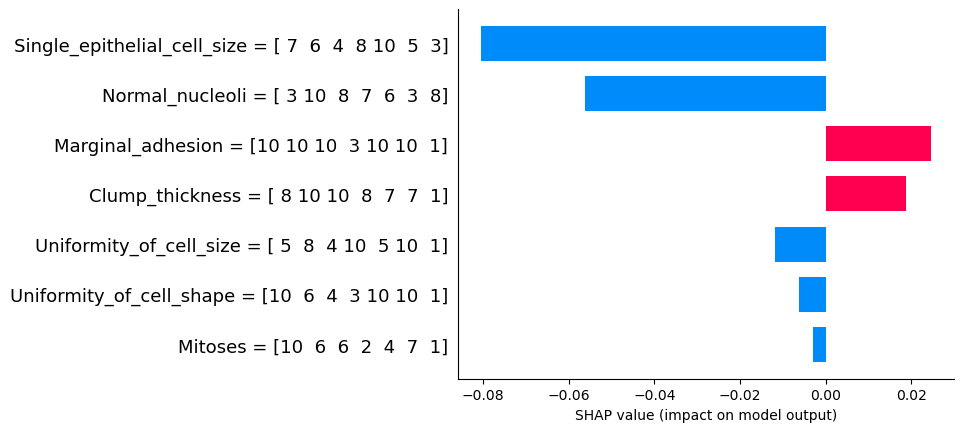

In [19]:
from src.utils.visualisation.deterministic_values import bar_plot
bar_plot(mean_stochastic_shapley_values.T[8], datasets[8], feature_names=feature_names)

In [20]:
# bar_plot(mean_stochastic_shapley_values.T[6], datasets[6], feature_names=feature_names)

In [21]:
import matplotlib.pyplot as plt

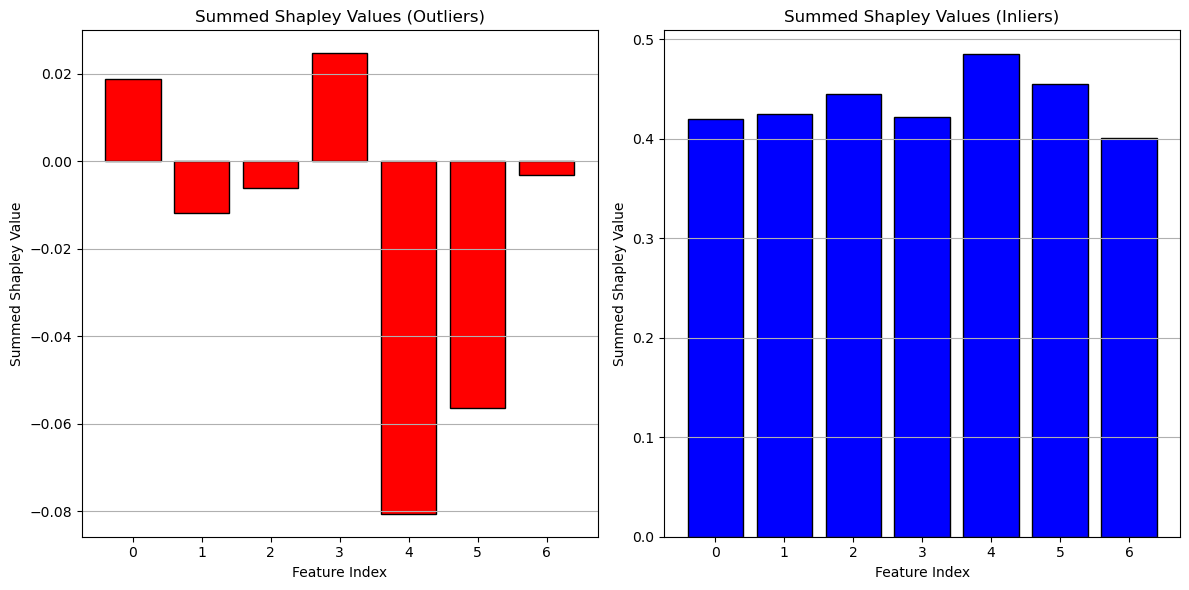

In [22]:
inlier_indices = [i for i in range(mean_stochastic_shapley_values.shape[1]) if i not in outlier_indices]

summed_outlier_shapley = mean_stochastic_shapley_values[:, outlier_indices].sum(dim=1).numpy()
summed_inlier_shapley = mean_stochastic_shapley_values[:, inlier_indices].sum(dim=1).numpy()

# Plot histogram
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Outlier Shapley Values
ax[0].bar(range(len(summed_outlier_shapley)), summed_outlier_shapley, color='red', edgecolor='black')
ax[0].set_title('Summed Shapley Values (Outliers)')
ax[0].set_xlabel('Feature Index')
ax[0].set_ylabel('Summed Shapley Value')
ax[0].grid(True, axis='y')

# Inlier Shapley Values
ax[1].bar(range(len(summed_inlier_shapley)), summed_inlier_shapley, color='blue', edgecolor='black')
ax[1].set_title('Summed Shapley Values (Inliers)')
ax[1].set_xlabel('Feature Index')
ax[1].set_ylabel('Summed Shapley Value')
ax[1].grid(True, axis='y')

plt.tight_layout()
plt.show()

The inliers seem to approximately have an equal contributions from all feature towards its decision, but for outliers, some feature contribute more towards making them outleirs. 


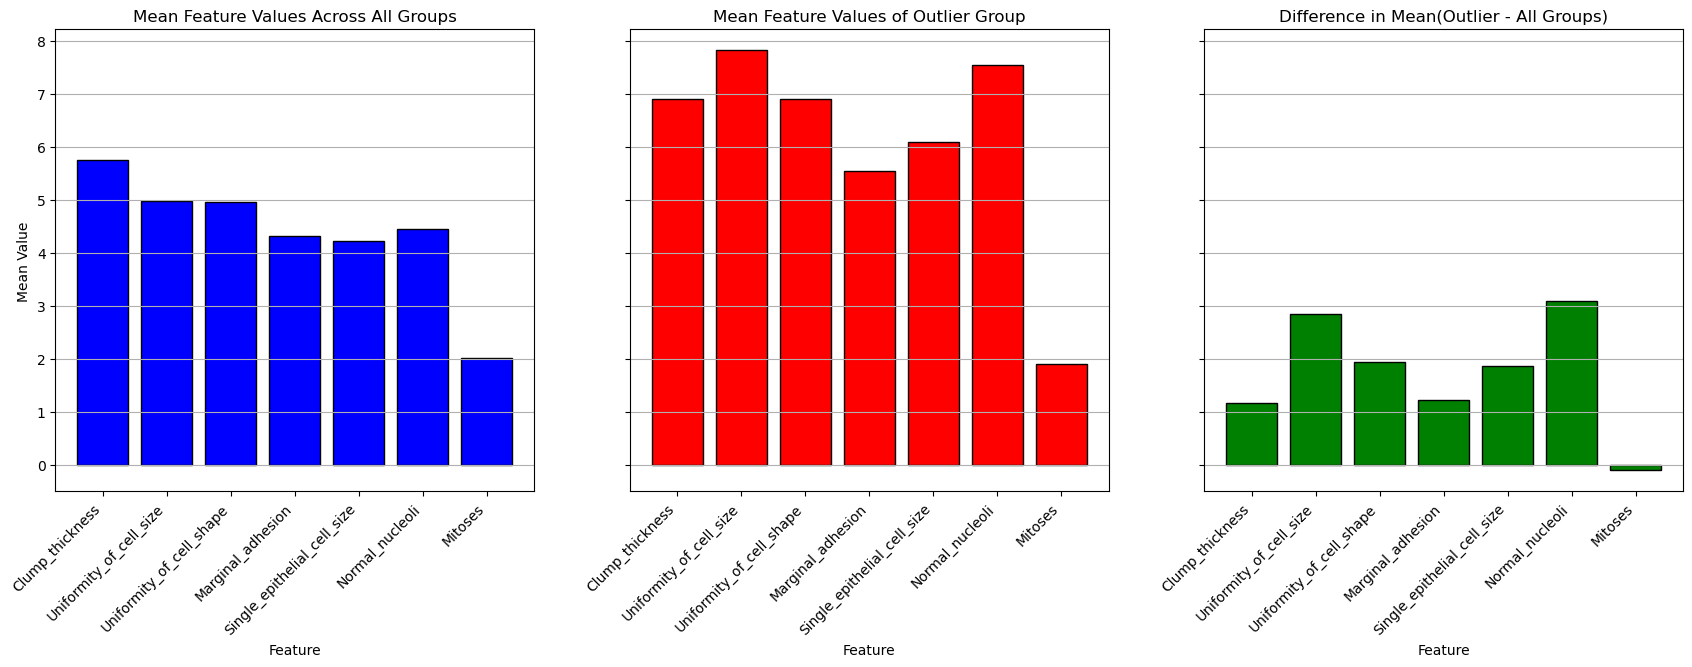

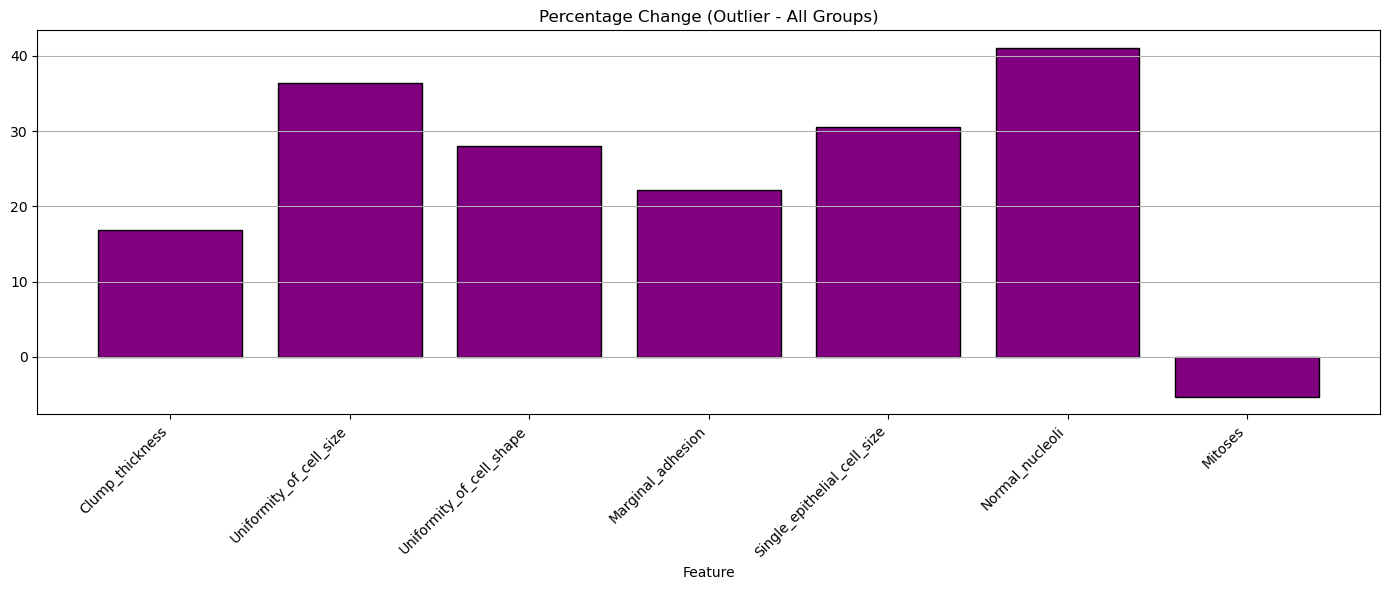

In [23]:
mean_all_groups = np.mean([np.mean(group, axis=0) for i, group in enumerate(datasets) if i != 8], axis=0)

# Compute mean feature values for the outlier group
mean_outlier_group = np.mean(datasets[8], axis=0)

# Compute the delta between the two (outlier vs all groups)
difference_values = mean_outlier_group - mean_all_groups

percentage_change = ((mean_outlier_group - mean_all_groups) / mean_outlier_group) * 100

# Feature names for labeling
num_features = len(mean_all_groups)
x_labels = feature_names[:num_features]  # Adjust based on the number of features

# Plot histograms
fig, ax = plt.subplots(1, 3, figsize=(21, 6), sharey=True)

# Mean feature values for all groups (excluding outlier)
ax[0].bar(range(num_features), mean_all_groups, color='blue', edgecolor='black')
ax[0].set_xticks(range(num_features))
ax[0].set_xticklabels(x_labels, rotation=45, ha='right')
ax[0].set_title('Mean Feature Values Across All Groups')
ax[0].set_xlabel('Feature')
ax[0].set_ylabel('Mean Value')
ax[0].grid(axis='y')

# Mean feature values for the outlier group
ax[1].bar(range(num_features), mean_outlier_group, color='red', edgecolor='black')
ax[1].set_xticks(range(num_features))
ax[1].set_xticklabels(x_labels, rotation=45, ha='right')
ax[1].set_title('Mean Feature Values of Outlier Group')
ax[1].set_xlabel('Feature')
ax[1].grid(axis='y')

# Delta values (difference between the outlier group and all groups)
ax[2].bar(range(num_features), difference_values, color='green', edgecolor='black')
ax[2].set_xticks(range(num_features))
ax[2].set_xticklabels(x_labels, rotation=45, ha='right')
ax[2].set_title('Difference in Mean(Outlier - All Groups)')
ax[2].set_xlabel('Feature')
ax[2].grid(axis='y')

# ax[3].bar(range(num_features), percentage_change, color='purple', edgecolor='black')
# ax[3].set_xticks(range(num_features))
# ax[3].set_xticklabels(x_labels, rotation=45, ha='right')
# ax[3].set_title('Percentage Change (Outlier - All Groups)')
# ax[3].set_xlabel('Feature')
# ax[3].grid(axis='y')

fig, ax2 = plt.subplots(figsize=(14, 6))  # New figure for the percentage change plot
ax2.bar(range(num_features), percentage_change, color='purple', edgecolor='black')
ax2.set_xticks(range(num_features))
ax2.set_xticklabels(x_labels, rotation=45, ha='right')
ax2.set_title('Percentage Change (Outlier - All Groups)')
ax2.set_xlabel('Feature')
ax2.grid(axis='y')

plt.tight_layout()
plt.show()

Normal nucleoli has a high difference in mean values 

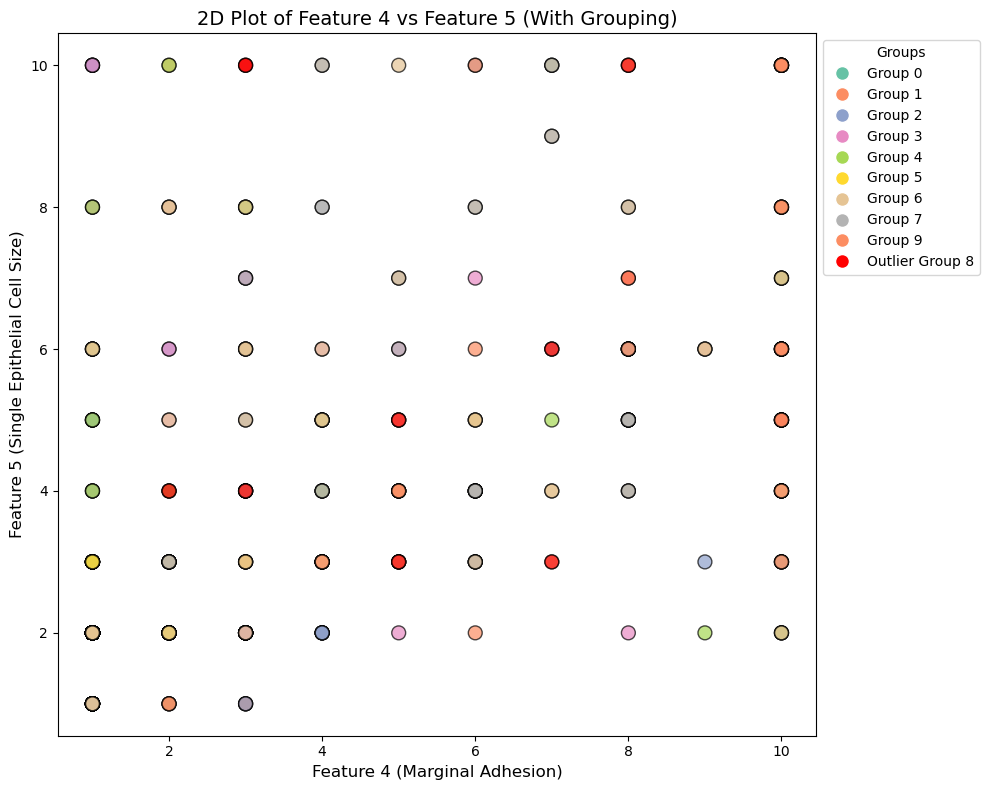

In [24]:

import seaborn as sns

feature_4_values = []
feature_5_values = []
group_labels = []

for i, group in enumerate(datasets):
    feature_4_values.extend(group[:, 3])  # Feature 4 (Marginal Adhesion)
    feature_5_values.extend(group[:, 4])  # Feature 5 (Single Epithelial Cell Size)
    group_labels.extend([i] * group.shape[0])  # Assign group label

# Convert to numpy arrays for plotting
feature_4_values = np.array(feature_4_values)
feature_5_values = np.array(feature_5_values)
group_labels = np.array(group_labels)

# Define the outlier group (e.g., group 8)
outlier_group = 8

num_groups = len(datasets)
color_palette = sns.color_palette("Set2", n_colors=num_groups)  # Adjusted to match number of groups

# Map each group to a color, with a special color for the outlier group
colors = ['red' if group == outlier_group else color_palette[group] for group in group_labels]

# Plotting
plt.figure(figsize=(10, 8))
plt.scatter(feature_4_values, feature_5_values, c=colors, s=100, edgecolors='k', alpha=0.7)

# Add labels and title
plt.title("2D Plot of Feature 4 vs Feature 5 (With Grouping)", fontsize=14)
plt.xlabel("Feature 4 (Marginal Adhesion)", fontsize=12)
plt.ylabel("Feature 5 (Single Epithelial Cell Size)", fontsize=12)

# Add a legend to show group colors
from matplotlib.lines import Line2D
legend_labels = [Line2D([0], [0], marker='o', color='w', markerfacecolor=color_palette[i], markersize=10, label=f'Group {i}') for i in range(num_groups) if i != outlier_group]
legend_labels.append(Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label=f'Outlier Group {outlier_group}'))
plt.legend(handles=legend_labels, loc='upper left', bbox_to_anchor=(1, 1), title="Groups")

# Display the plot
plt.tight_layout()
plt.show()

## Add an artificial feature

In [25]:
X_scaled_df = pd.DataFrame(X, columns=X.columns)
grouped_data = []

for i, (_, group) in enumerate(X_scaled_df.groupby('Bland_chromatin')):
    group_data = group.drop(columns=['Bland_chromatin']).to_numpy()
    artificial_feature = np.ones((group_data.shape[0],1))  # Default value = 1
    if i == 5 :  # group 5 has abnormal a_f value
        artificial_feature.fill(10)
    
    group_data = np.hstack((group_data, artificial_feature))  # Append feature
    grouped_data.append(group_data)

In [26]:
feature_names.append('artificial_feature')

In [27]:
datasets = grouped_data

In [28]:
datasets

[array([[2., 1., 1., ..., 1., 5., 1.],
        [1., 1., 3., ..., 1., 1., 1.],
        [3., 1., 1., ..., 1., 1., 1.],
        ...,
        [3., 1., 1., ..., 1., 1., 1.],
        [3., 1., 1., ..., 1., 1., 1.],
        [2., 1., 1., ..., 1., 1., 1.]]),
 array([[4., 2., 1., ..., 1., 1., 1.],
        [2., 1., 1., ..., 1., 1., 1.],
        [4., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 2., ..., 1., 1., 1.],
        [3., 1., 1., ..., 3., 1., 1.],
        [3., 1., 1., ..., 1., 2., 1.]]),
 array([[5., 1., 1., ..., 1., 1., 1.],
        [5., 4., 4., ..., 2., 1., 1.],
        [3., 1., 1., ..., 1., 1., 1.],
        ...,
        [3., 2., 1., ..., 1., 1., 1.],
        [2., 1., 1., ..., 1., 1., 1.],
        [5., 1., 1., ..., 2., 1., 1.]]),
 array([[ 5.,  3.,  3.,  3.,  2.,  4.,  1.,  1.],
        [ 7.,  4.,  6.,  4.,  6.,  3.,  1.,  1.],
        [10.,  7.,  7.,  6.,  4.,  1.,  2.,  1.],
        [ 3.,  7.,  7.,  4.,  4.,  8.,  1.,  1.],
        [10.,  3.,  6.,  2.,  3., 10.,  2.,  1.],
   

In [29]:
feature_names

['Clump_thickness',
 'Uniformity_of_cell_size',
 'Uniformity_of_cell_shape',
 'Marginal_adhesion',
 'Single_epithelial_cell_size',
 'Normal_nucleoli',
 'Mitoses',
 'artificial_feature']

In [30]:
classifier = OneClassSMMClassifier(nu=0.5)

In [31]:
classifier.fit(datasets)

In [32]:
decision, y_pred = classifier.predict(datasets)

In [33]:
decision

array([ 0.31982131,  0.55780178,  0.53218805,  0.38482455,  0.29124989,
       -0.72667681,  1.15057056,  0.31982134, -0.24807601,  0.04386018])

In [34]:
y_pred

array([ 1.,  1.,  1.,  1.,  1., -1.,  1.,  1., -1.,  1.])

In [35]:
outlier_indices = [i for i, value in enumerate(y_pred) if value == -1]
outlier_indices

[5, 8]

In [36]:
from src.explanation_algorithms.OCSMMSHAP import OCSMMSHAP
ocsmm_shap = OCSMMSHAP(X=datasets, classifier=classifier, decision=decision)
ocsmm_shap.fit_ocsmmshap(X=datasets, num_coalitions=2**len(feature_names))

divide by zero encountered in log2
invalid value encountered in cast
invalid value encountered in log2
100%|██████████| 255/255 [00:03<00:00, 77.76it/s]


In [37]:
mean_stochastic_shapley_values = ocsmm_shap.return_deterministic_shapley_values()

In [38]:
mean_stochastic_shapley_values.T

tensor([[ 0.0330,  0.0555,  0.0634,  0.0459,  0.0393,  0.0245,  0.0169,  0.0446],
        [ 0.1056,  0.0663,  0.0894,  0.0900,  0.0846,  0.0573,  0.0241,  0.0383],
        [ 0.0731,  0.0766,  0.0747,  0.0855,  0.0471,  0.0819,  0.0284,  0.0645],
        [ 0.0508,  0.0460,  0.0259,  0.0067,  0.0846,  0.0990,  0.0040,  0.0683],
        [ 0.0413,  0.0704,  0.0114, -0.0078,  0.0519,  0.0321,  0.0297,  0.0625],
        [-0.1164, -0.0766, -0.0548, -0.1035, -0.1022, -0.0471, -0.0560, -0.1699],
        [ 0.1165,  0.1297,  0.1316,  0.1753,  0.1606,  0.1784,  0.1777,  0.0802],
        [ 0.0395,  0.0246,  0.0585,  0.0605,  0.0414,  0.0083,  0.0528,  0.0342],
        [-0.0120, -0.0433, -0.0347, -0.0126, -0.1167, -0.0735, -0.0161,  0.0614],
        [ 0.0120, -0.0065, -0.0015,  0.0101,  0.0145, -0.0501,  0.0304,  0.0352]])

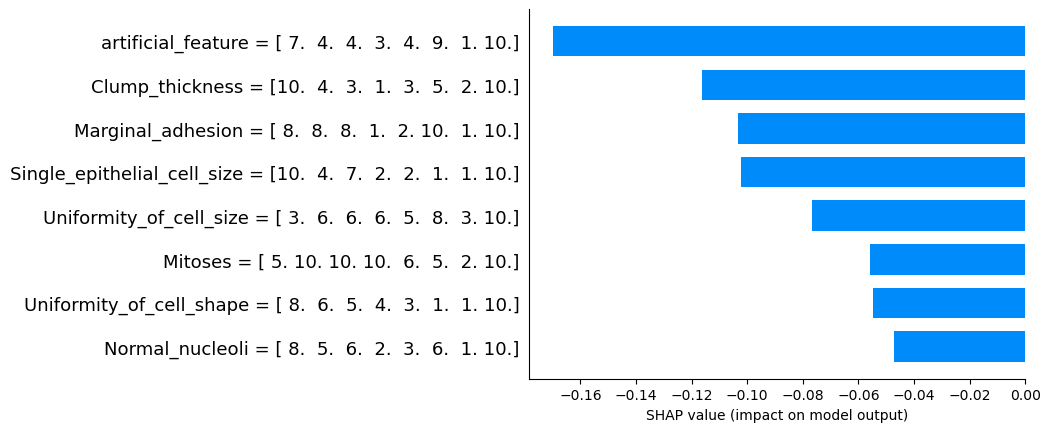

In [39]:
from src.utils.visualisation.deterministic_values import bar_plot
bar_plot(mean_stochastic_shapley_values.T[5], datasets[5], feature_names=feature_names)

Artificial_feature is the reason for this being an outlier. 

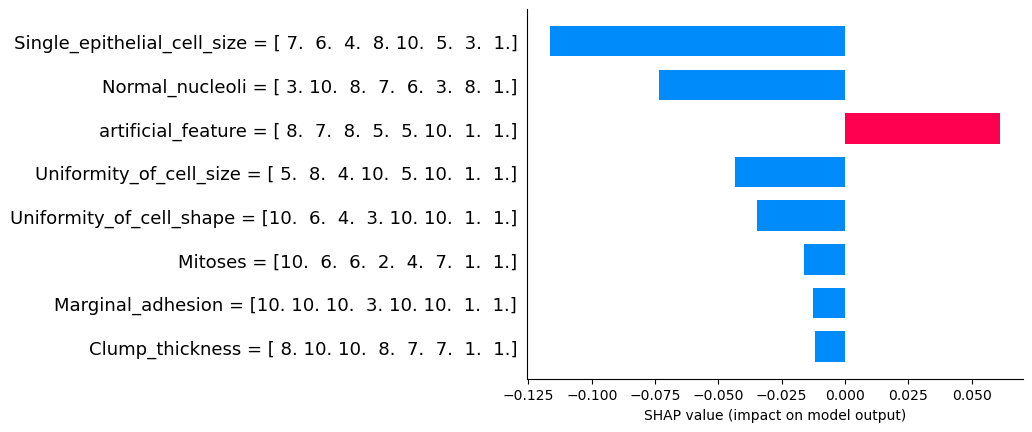

In [40]:
bar_plot(mean_stochastic_shapley_values.T[8], datasets[8], feature_names=feature_names)

The features contributing to this group being an outleir remain the same.